In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [4]:
input_size = 100
hidden_size = 200
num_classes = 500
num_epochs = 5
batch_size = 100
learning_rate = 0.0001

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        return out

In [20]:
model = Net(input_size,hidden_size,num_classes)
#model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate) #Adam

In [7]:
epochs = 100

In [9]:
# test
losses=[]
for epoch in range(epochs):
    
    epoch +=1
    
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.FloatTensor))
        labels = Variable(y.type(torch.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        
            
        loss = criterion(outputs, labels)
        

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.3746865391731262
epoch 2, loss 0.3043023943901062
epoch 3, loss 0.2895157039165497
epoch 4, loss 0.29486140608787537
epoch 5, loss 0.31053265929222107
epoch 6, loss 0.32243481278419495
epoch 7, loss 0.3307904899120331
epoch 8, loss 0.34121212363243103
epoch 9, loss 0.34323665499687195
epoch 10, loss 0.3438132107257843
epoch 11, loss 0.3415423631668091
epoch 12, loss 0.3419231176376343
epoch 13, loss 0.34146401286125183
epoch 14, loss 0.34240132570266724
epoch 15, loss 0.34272265434265137
epoch 16, loss 0.3428555130958557
epoch 17, loss 0.3404766023159027
epoch 18, loss 0.3363470733165741
epoch 19, loss 0.33732181787490845
epoch 20, loss 0.3365790545940399
epoch 21, loss 0.3382005989551544
epoch 22, loss 0.3384447395801544
epoch 23, loss 0.34148550033569336
epoch 24, loss 0.3458572328090668
epoch 25, loss 0.34628596901893616
epoch 26, loss 0.3418442904949188
epoch 27, loss 0.3532123863697052
epoch 28, loss 0.3487386703491211
epoch 29, loss 0.3484891951084137
epoch 30, lo

## Evaluate the performance on the training data

In [10]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 78.54223433242507


## Evaluate the model on the testing data

In [12]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 72.78287461773701


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
## Saved , uncomment the below line if you want to save it
# np.save("Y_test",Y_test)
# np.save("Y_test_pred.npy",np.array(Y_test_pred))

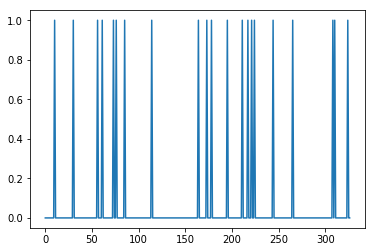

In [15]:
plt.plot(Y_test_pred)

In [16]:
## For the entire dataset

In [18]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 77.96506282562059


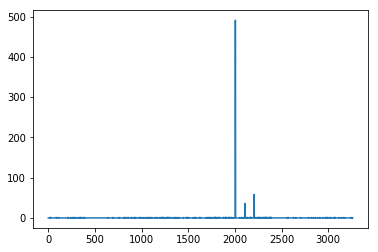

In [19]:
plt.plot(Y_pred)